In [1]:
import collect
from mnist_data import MnistData
from mnist_classifier import MnistClassifier

from cifar_data import Cifar10Data
from cifar_classifier import Cifar10Classifier

data_dispatch = {'mnist': MnistData, 'cifar10': Cifar10Data, 'cifar': Cifar10Data}
classifier_dispatch = {'mnist': MnistClassifier, 'cifar10': Cifar10Classifier, 'cifar': Cifar10Classifier}

/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load data 
#### (changable by dataset_name)

In [2]:
dataset_name = 'cifar10'

features_data = data_dispatch[dataset_name](use_features=True)
raw_data = data_dispatch[dataset_name](use_features=False)

features, features_labels = features_data._features_and_labels()
images, raw_labels = raw_data._features_and_labels()

n_clusters = 30
data = collect.load_quadruplets(n_clusters, dataset_name=dataset_name)
quadruplets, cat_to_centroids, cat_to_vectors, original_shape = data

In [3]:
import numpy as np

from scipy.spatial.distance import cosine


def norm_measure(u, v):
    return np.linalg.norm(u - v)


def sort_features(features, category=None, distance_measure=cosine):
    if category is None:
        keys = list(cat_to_centroids.keys())
        idx = np.random.choice(len(keys))
        category = keys[idx]
        
    centroids = cat_to_centroids[category]
    
#     idx = np.random.choice(len(centroids))
#     centroid = centroids[idx] 
    
    all_distances = []
    for i, centroid in enumerate(centroids):
        all_distances += [np.array([distance_measure(ϕ, centroid) for ϕ in features])]

    argsorts = [np.argsort(distances) for distances in all_distances]
    return argsorts, category, centroid

In [4]:
argsorts, category, centroid = sort_features(features)

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt

# plt.switch_backend('agg')

# plt.rcParams["figure.figsize"] = [20, 2]

def add_image_to_figure_mnist(vector, width=28, height=28):
    fig = plt.imshow(np.reshape(vector, (height, width)), interpolation='nearest')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    

def add_image_to_figure_cifar(vector):
    img = vector.reshape(32, 32, 3)
    fig = plt.imshow(img)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)


def add_images_to_mnist(vectors, titles=None, n_cols=4, width=32, height=32):
    n_rows = len(vectors) / n_cols if len(vectors) % n_cols == 0 else (len(vectors) / n_cols) + 1
#     for i, (vector, title) in enumerate(zip(vectors, titles)):
#         plt.subplot(n_rows, n_cols, i + 1)
#         plt.title(title)
#         add_image_to_figure(vector.astype(float), height, width)
    for i, vector in enumerate(vectors):
        plt.subplot(n_rows, n_cols, i + 1)
        add_image_to_figure(vector.astype(float), height, width)
    
    plt.tight_layout()
    
    
def add_images_to_cifar(vectors, titles=None, n_cols=4):
    n_rows = len(vectors) / n_cols if len(vectors) % n_cols == 0 else (len(vectors) / n_cols) + 1
#     for i, (vector, title) in enumerate(zip(vectors, titles)):
#         plt.subplot(n_rows, n_cols, i + 1)
#         plt.title(title)
#         add_image_to_figure(vector.astype(float), height, width)
    for i, vector in enumerate(vectors):
        plt.subplot(n_rows, n_cols, i + 1)
        add_image_to_figure_cifar(vector.astype(float))
    
    plt.tight_layout()

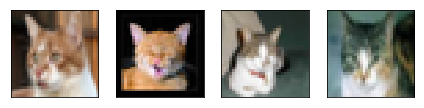

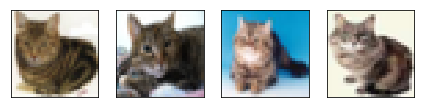

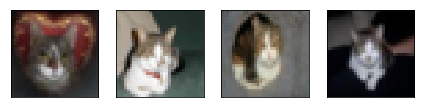

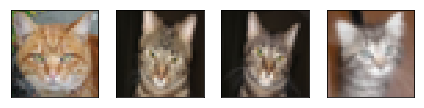

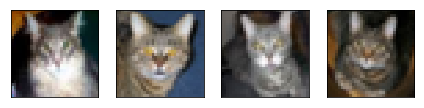

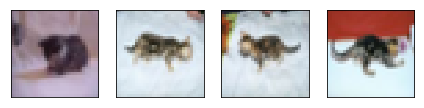

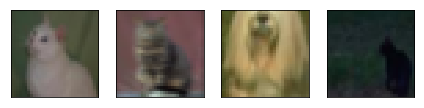

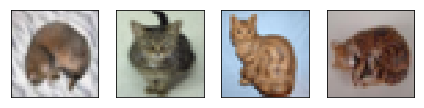

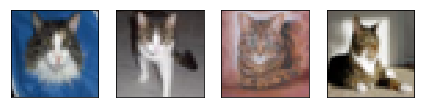

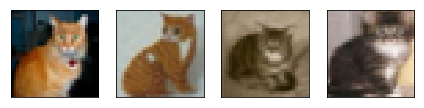

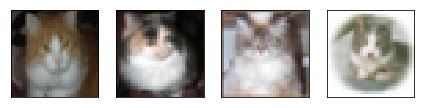

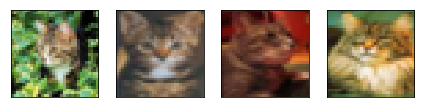

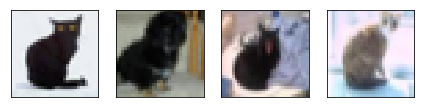

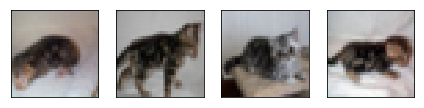

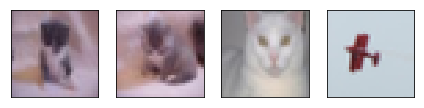

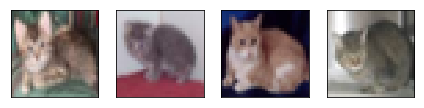

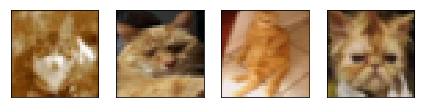

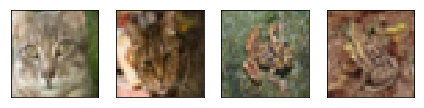

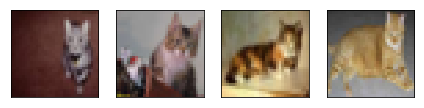

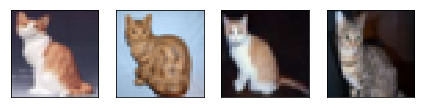

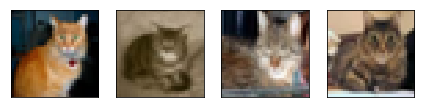

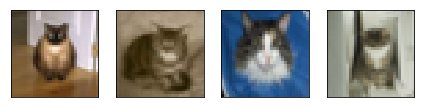

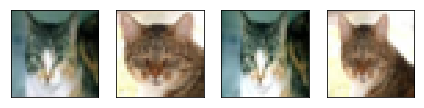

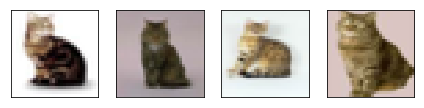

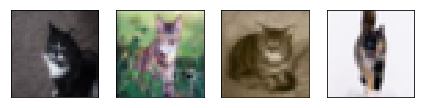

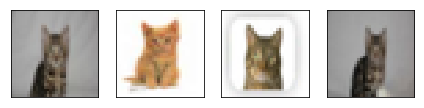

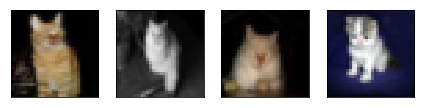

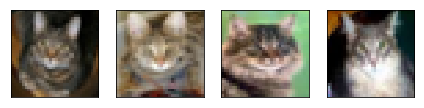

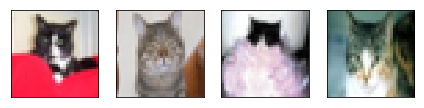

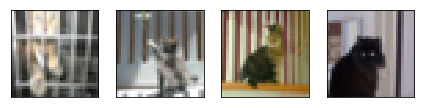

In [22]:
# vectors = np.concatenate([images[argsort[:4]] for argsort in argsorts])
# add_images_to_figure(vectors)

for argsort in argsorts:
    vectors = images[argsort[0:4]]
    add_images_to_cifar(vectors)
    plt.show()